<a href="https://colab.research.google.com/github/DiFedorchuk/ML_Course/blob/main/HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from google.colab import drive
from matplotlib.lines import lineStyles
import plotly.express as px
import seaborn as sns

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
drive.mount('/content/drive')
cars_df = pd.read_csv("/content/drive/MyDrive/Courses/Machine Learning/Data/cars.csv")

Mounted at /content/drive


In [3]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [4]:
cars_df.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [6]:
for column in cars_df.select_dtypes(include='object').columns:
    print(f"Column '{column}':")
    types = set()
    for item in cars_df[column].dropna().unique():
        types.add(type(item))
    print(f"Тип даних колонки: {types}")
    print(f"Кількість унікальних значень в колонці: {cars_df[column].nunique()}")
    print("----------------------------------------------------------------")

Column 'Brand':
Тип даних колонки: {<class 'str'>}
Кількість унікальних значень в колонці: 11
----------------------------------------------------------------
Column 'Model':
Тип даних колонки: {<class 'str'>}
Кількість унікальних значень в колонці: 58
----------------------------------------------------------------
Column 'Fuel_Type':
Тип даних колонки: {<class 'str'>}
Кількість унікальних значень в колонці: 2
----------------------------------------------------------------
Column 'Transmission':
Тип даних колонки: {<class 'str'>}
Кількість унікальних значень в колонці: 2
----------------------------------------------------------------
Column 'Owner_Type':
Тип даних колонки: {<class 'str'>}
Кількість унікальних значень в колонці: 3
----------------------------------------------------------------


Висновок:
cars_df містить 13 колонок з яких 8 колонок є числовими, 5 категоріальними, з яких
Fuel_Type та  Transmission є бінарними та містять лише 2 значення.
Owner_Type є мультикатегоріальною колонкою в якій можна встановити порядок. Brand та Model є мультикатегоріальними  колонками в яких немає відношення порядку

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [7]:
from sklearn.model_selection import train_test_split
X = cars_df.drop('Price', axis=1)
y = cars_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [8]:
# 1
Fuel_Type_codes = {'Petrol': 1, 'Diesel': 0}
Transmission_codes = {'Automatic': 1, 'Manual': 0}
X_test['Fuel_Type_Code'] = X_test.Fuel_Type.map(Fuel_Type_codes)
X_test['Transmission_Code'] = X_test.Transmission.map(Transmission_codes)
X_train['Fuel_Type_Code'] = X_train.Fuel_Type.map(Fuel_Type_codes)
X_train['Transmission_Code'] = X_train.Transmission.map(Transmission_codes)

In [9]:
# 2
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
# Фітимо тренувальні дані
enc.fit(X_train[['Brand']])
# Трансформуємо тестувальні та тренувальні дані в масив та додаємо закодовані значення до наборів даних
brand_test = enc.transform(X_test[['Brand']]).toarray()
X_test[enc.categories_[0]] = brand_test
brand_train = enc.transform(X_train[['Brand']]).toarray()
X_train[enc.categories_[0]] = brand_train

In [10]:
# 3
from sklearn.preprocessing import OrdinalEncoder
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])
X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])
# За допомогою OrdinalEncoder замінили текстові значення  на інтові, першому відповідає 0, другому 1 і тд..
# За допомогою fit аналізуємо дані колонки на тренувальних даних
# Використовуємо transform обчислені параметри до даних

Очікуваний результат після трансформацій:

In [11]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

In [ ]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [12]:
X_train_cleaned = X_train.copy()
if 'Price' in X_train_cleaned.columns:
    price_column = [column for column in X_train_cleaned.columns if column == 'Price']
    X_train_cleaned = X_train_cleaned.drop(columns=price_column)
X_train_num = X_train_cleaned.select_dtypes(exclude='object')
X_train = pd.concat([X_train_num, y_train], axis=1)
print("Columns  X_train:", X_train.columns.tolist())


Columns  X_train: ['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Fuel_Type_Code', 'Transmission_Code', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota', 'Volkswagen', 'Owner_Type_Codes', 'Price']


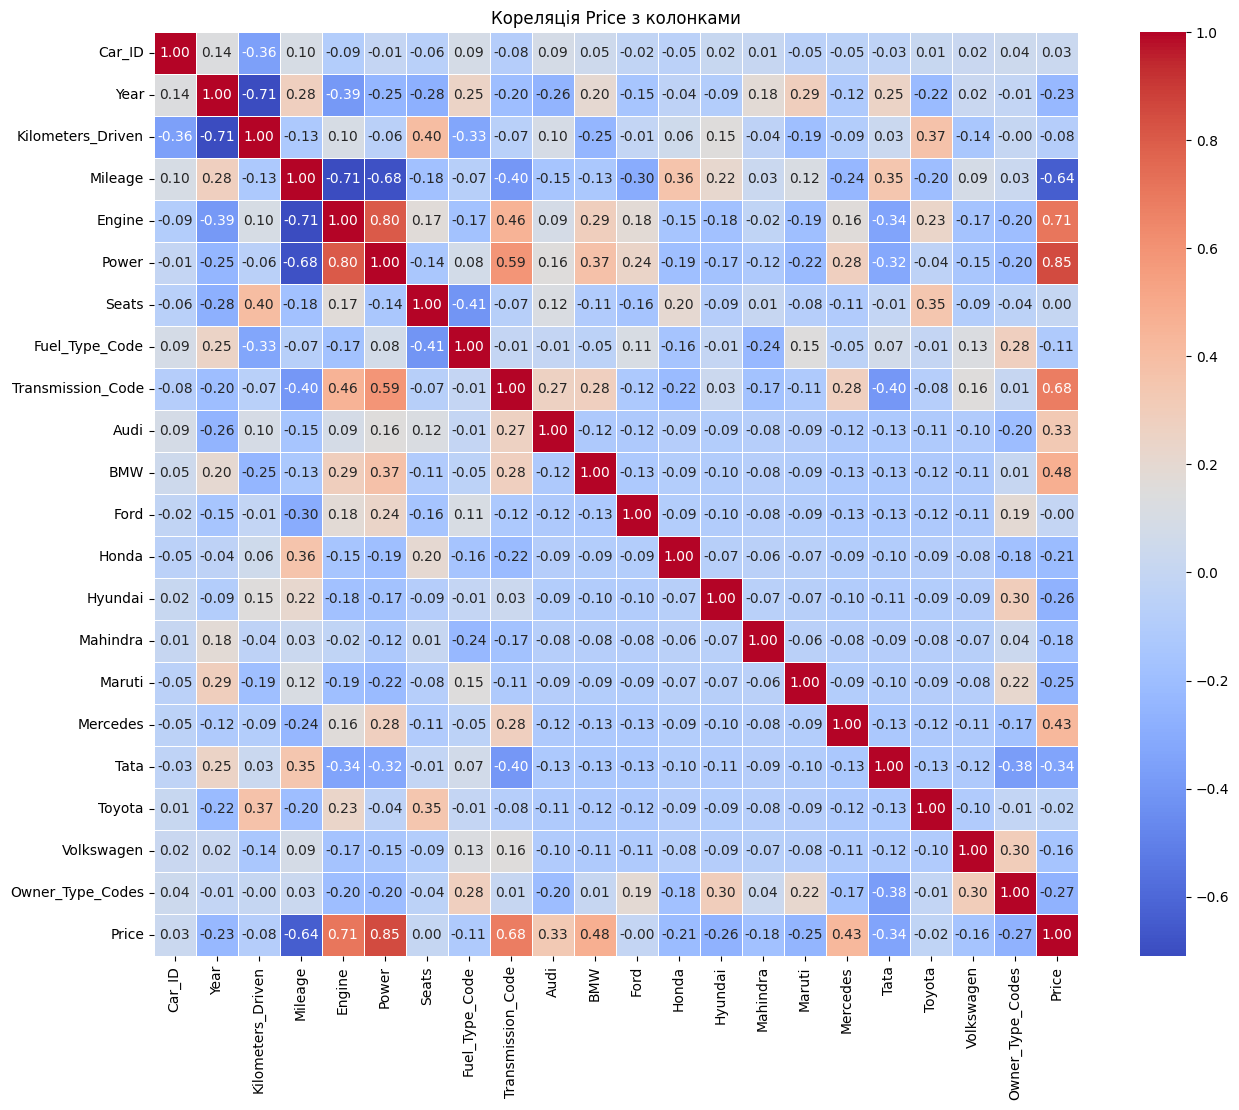

Колонки з високою з кореляцією > 0.5 /(-0.5):
Price                1.000000
Power                0.849137
Engine               0.710561
Transmission_Code    0.680731
Mileage             -0.638404
Name: Price, dtype: float64


In [13]:
X_train_corr = X_train.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(X_train_corr, annot=True, cmap='coolwarm', fmt=".2f",linewidths=0.5,
            square=True)
plt.title('Кореляція Price з колонками')
plt.show()
price_corr = X_train_corr['Price']
high_price_corr = price_corr[price_corr.abs() > 0.5].sort_values(ascending=False)
print("Колонки з високою з кореляцією > 0.5 /(-0.5):")
print(high_price_corr)

Висновок: Power, Engine, Transmission_Code, Mileage є найбільш корелюєчими колонками від значень яких в основному буде залежити фінальна ціна на авто

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [14]:
X_test = X_test.select_dtypes(exclude=['object'])

In [15]:
# передбачення на X_train
input_train = X_train.drop('Price', axis=1)
target_train = y_train
model = LinearRegression().fit(input_train, target_train)
predict_train = model.predict(input_train)
rmse_train = root_mean_squared_error(target_train, predict_train)
print(f'Root Mean Squared Error тренувального датафрейму: {rmse_train:.2f}')


Root Mean Squared Error тренувального датафрейму: 210293.58


In [16]:
# передбачення на X_test
input_test = X_test
predict_test = model.predict(input_test)
rmse_test = root_mean_squared_error(y_test, predict_test)
print(f'Root Mean Squared Error тестового датафрейму: {rmse_test:.2f}')

Root Mean Squared Error тестового датафрейму: 258181.56


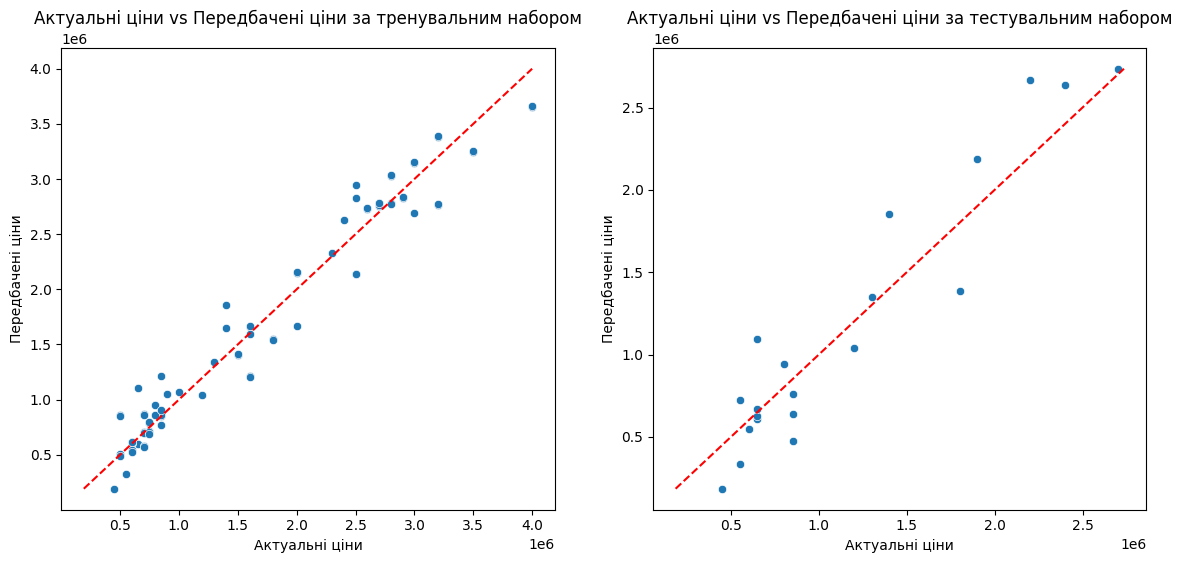

In [17]:
# графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних
plt.figure(figsize=(14,6))
# train graph
plt.subplot(1, 2, 1)
sns.scatterplot(x = target_train, y = predict_train)
plt.xlabel('Актуальні ціни')
plt.ylabel('Передбачені ціни')
plt.title('Актуальні ціни vs Передбачені ціни за тренувальним набором')
max_value = max(target_train.max(), predict_train.max())
min_value = min(target_train.min(), predict_train.min())
plt.plot([min_value, max_value], [min_value, max_value], color = 'red', linestyle = '--')
# test graph
plt.subplot(1, 2, 2)
sns.scatterplot(x = y_test, y = predict_test)
plt.xlabel('Актуальні ціни')
plt.ylabel('Передбачені ціни')
plt.title('Актуальні ціни vs Передбачені ціни за тестувальним набором')
max_value = max(y_test.max(), predict_test.max())
min_value = min(y_test.min(), predict_test.min())
plt.plot([min_value, max_value], [min_value, max_value], color = 'red', linestyle = '--')

Висновок: Якщо порівняємо значення RMSE то тестувальний набір даних має вище значення за тренувальний, швидше за все це  через те що модель працює краще на тренувальних даних на яких фітилась. На графіку бачимо що значення вцілому розшташовані близько лінії, тренувальних даних ця тенденція спостерігається більше, на тестовому графіку точки показують більшу розсіяність від лінії. Загалом на мою думку модель має прийнятну якість хоч і не ідеальну що показує велике значення RMSE

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [18]:
# 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Фітимо на тренувальні дані
scaler.fit(input_train)
# Викликаємо Transform
scaler_X_train = pd.DataFrame(scaler.transform(input_train), columns=input_train.columns, index=input_train.index)
scaler_X_test = pd.DataFrame(scaler.transform(input_test), columns=input_test.columns, index=input_test.index)
display(scaler_X_train.head())
display(scaler_X_test.head())

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,1.090928,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,0.975305,0.795395,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,3.229330,0.535303
55,0.100381,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,-1.025320,0.795395,3.000000,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.994135
26,-0.925542,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,0.975305,0.795395,3.000000,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.994135
54,0.065005,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,0.975305,-1.257237,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,3.229330,0.535303
19,-1.173178,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,0.975305,0.795395,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,2.808717,-0.377964,-0.333333,-0.309662,0.535303


,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,-1.243932,-2.107952,1.051030,-0.604696,-0.785333,-0.231967,-0.303562,0.975305,0.795395,3.000000,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,0.535303
41,-0.394892,0.568813,-0.257646,0.861234,-1.255859,-1.214487,-0.303562,0.975305,-1.257237,-0.333333,-0.356034,-0.356034,-0.258199,3.511885,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,2.064742
92,1.409318,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,0.975305,-1.257237,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,3.229330,0.535303
14,-1.350062,1.461068,-1.130096,0.568048,-0.683310,-0.784634,2.394771,0.975305,-1.257237,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,3.872983,-0.356034,-0.377964,-0.333333,-0.309662,-0.994135
68,0.560278,0.568813,-0.257646,0.861234,-1.091404,-0.895168,-0.303562,0.975305,-1.257237,-0.333333,-0.356034,2.808717,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,2.064742


In [19]:
# 2
model_scaler = LinearRegression()
# Фітимо, модель навчається на тренувальних даних
model_scaler.fit(scaler_X_train, y_train)
# Get the coefficients and feature names
coefficients = model_scaler.coef_
feature = scaler_X_train.columns
# Створюємо датафрейм з коефіцієнтами колонок
coef_df = pd.DataFrame({'Feature': feature, 'Coefficient': coefficients})
# Сортуємо за спаданням
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
display(coef_df)

,Feature,Coefficient
5,Power,496769.214899
16,Mercedes,210048.781148
10,BMW,208407.313783
9,Audi,205600.147769
8,Transmission_Code,116693.768206
20,Owner_Type_Codes,42344.952815
18,Toyota,15805.701511
0,Car_ID,5608.685421
6,Seats,-2148.924549
1,Year,-8765.645714


Висновок: З точки зору коефіцієнтів найбільший вплив має Power Transmision_Code, Owner_Type. Це виглядає логічно, так як чим більш потужніший автомобіль тим дорожча його ціна, також автоматичка коробка передач та чим менше власників було в авто також збільшують ціну. Також бачимо що преміальні бренди як BMW, Audi, Mercedes також впливають на вартість авто в сторону зростання. З чинників які негативно впливають на ціну можна визначити рік авто, чим старіше авто тим дешевша його ціна, пробіг в км, чим він більший тим ціна зменшується

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [31]:
import statsmodels.api as sm
# Додаємо константу
X_train_stat = sm.add_constant(scaler_X_train)
# Тренуємо модель
model_sm = sm.OLS(y_train, X_train_stat).fit()
print(model_sm.summary())
# Витягуємо p-value менше 0.05
p_values = model_sm.pvalues
significant_features = p_values[p_values < 0.05]
print("\nСтатистично значущі ознаки на рівні значущості 0.05:", significant_features.index.tolist())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Thu, 29 Jan 2026   Prob (F-statistic):           2.01e-33
Time:                        09:25:29   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.74e+0

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [35]:
# Створюємо список стат значущих колонок
significant_features_cols = significant_features.index.tolist()
X_train_stat_sig_cols = scaler_X_train[significant_features_cols[1:]]
# Додаємо константу
X_train_stat_sig_cols = sm.add_constant(X_train_stat_sig_cols)
# Тренуємо модель
model_sm_sig_cols = sm.OLS(y_train, X_train_stat_sig_cols).fit()
print(model_sm_sig_cols.summary())
print(f'R2 моделі з стат значущими ознаками = {model_sm_sig_cols.rsquared:.5f}; R2 моделі з усіма ознаками = {model_sm.rsquared:.5f}')
print(f'Adj моделі з стат значущими ознаками = {model_sm_sig_cols.rsquared_adj:.5f}; Adj моделі з усіма ознаками = {model_sm.rsquared_adj:.5f}')

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Thu, 29 Jan 2026   Prob (F-statistic):           4.12e-39
Time:                        09:44:54   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.78e+0

Висновок: Різниця показників R2 та  Adj в моделей з стат значущими ознаками та без не є значною. У моделі з стат значущими ознаками результати кращі. Можемо припустити що не стат значущі ознаки які відкинуті в другій моделі не дали сильного впливу на результат, у звязку з тим що різниця показників моделей не велика

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 8 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 8? Яку модель з останніх 3х завдань ви б лишили для використання?

In [41]:
# Обираємо p-value менше 0,25
new_features = p_values[p_values < 0.25]
# Створюємо список колонок
new_features_cols = new_features.index.tolist()
X_train_new = scaler_X_train[new_features_cols[1:]]
# Додаємо константу
X_train_new = sm.add_constant(X_train_new)
# Тренуємо модель
model_new = sm.OLS(y_train, X_train_new).fit()
print(model_new.summary())
print('----------------------------------------------------------------------------------------------')
print(f'R2 з стат значущими ознаками = {model_sm_sig_cols.rsquared:.5f}; Adj з стат значущими ознаками = {model_sm_sig_cols.rsquared_adj:.5f}')
print('----------------------------------------------------------------------------------------------')
print(f'R2 моделі з усіма ознаками = {model_sm.rsquared:.5f}; Adj моделі з усіма ознаками = {model_sm.rsquared_adj:.5f}')
print('----------------------------------------------------------------------------------------------')
print(f'R2 моделі з усіма ознаками p-value < 0,25 = {model_new.rsquared:.5f}; Adj моделі з усіма ознаками p-value < 0,25 = {model_new.rsquared_adj:.5f}')
print('----------------------------------------------------------------------------------------------')

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Thu, 29 Jan 2026   Prob (F-statistic):           4.85e-38
Time:                        10:33:08   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.65e+0

Висновок: З результатів бачимо, що вцілому показники на надто сильно відрізняються один від одного в трьох моделях. Модель з ознаками p-value менше за 0,25 має найбільше значення Adj, модель з усіма ознаками має найбільший R2. В даному випадку виріщив надати перевагу моделі з найвищим Adj показником, так як віз зростає при покращенні моделі, саме дану модель я б залишив для використання